# **seq2seq 모델 구현**

## 1. 전처리

In [4]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 60.8 MB/s 
     |████████████████████████████████| 453 kB 61.5 MB/s 


In [5]:
from preprocess import *

In [6]:
PATH = 'data/ChatBotData.csv_short'
VOCAB_PATH = 'data/vocabulary.txt'

In [7]:
inputs, outputs = load_data(PATH)

In [8]:
char2idx, idx2char, vocab_size = load_vocabulary(PATH, VOCAB_PATH, tokenize_as_morph=False)

In [9]:
index_inputs, input_seq_len = enc_processing(inputs, char2idx, tokenize_as_morph=False)
index_outputs, output_seq_len = dec_output_processing(outputs, char2idx, tokenize_as_morph=False)
index_targets = dec_target_processing(outputs, char2idx, tokenize_as_morph=False)

In [10]:
data_configs = {}
data_configs['char2idx'] = char2idx
data_configs['idx2char'] = idx2char
data_configs['vocab_size'] = vocab_size
data_configs['pad_symbol'] = PAD
data_configs['std_symbol'] = STD
data_configs['end_symbol'] = END
data_configs['unk_symbol'] = UNK

In [11]:
DATA_IN_PATH = './data/'
TRAIN_INPUTS = 'train_inputs.npy'
TRAIN_OUTPUTS = 'train_outputs.npy'
TRAIN_TARGETS = 'train_targets.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_INPUTS, 'wb'), index_inputs)
np.save(open(DATA_IN_PATH + TRAIN_OUTPUTS , 'wb'), index_outputs)
np.save(open(DATA_IN_PATH + TRAIN_TARGETS , 'wb'), index_targets)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

In [12]:
char2idx

{'<END>': 2,
 '<PAD>': 0,
 '<SOS>': 1,
 '<UNK>': 3,
 '가끔': 5,
 '가끔은': 37,
 '가난한': 66,
 '가만': 101,
 '가상화폐': 63,
 '가스불': 94,
 '가스비': 95,
 '감기': 65,
 '갔어': 50,
 '같아': 42,
 '같아요': 24,
 '거예요': 29,
 '거짓말': 57,
 '걸리겠어': 33,
 '것': 60,
 '게': 91,
 '결단은': 36,
 '교회': 83,
 '구하셨나요': 13,
 '궁금해': 71,
 '그': 25,
 '그럴': 59,
 '끄고': 75,
 '나': 69,
 '나갔어': 16,
 '나라를': 18,
 '나오세요': 76,
 '나온거': 68,
 '나왔다': 20,
 '남자친구': 78,
 '남자친구가': 9,
 '너무': 90,
 '다시': 8,
 '다음': 47,
 '달에는': 87,
 '더': 48,
 '데려가고': 7,
 '돈은': 84,
 '돌아가서': 46,
 '들어올': 105,
 '따뜻하게': 70,
 '따라': 56,
 '땀난다': 21,
 '땀을': 110,
 '때까지': 67,
 '또': 26,
 '마세요': 88,
 '마음을': 62,
 '많이': 108,
 '망함': 35,
 '뭐가': 64,
 '뭐하는지': 19,
 '뭘': 58,
 '믿어줘': 44,
 '바빠': 80,
 '보인다': 38,
 '비싼데': 97,
 '빠를수록': 10,
 '빨리': 14,
 '사람도': 40,
 '사세요': 51,
 '새출발': 109,
 '생각해보세요': 27,
 '생일인데': 45,
 '선물로': 34,
 '설득해보세요': 82,
 '설움': 43,
 '승진': 93,
 '식혀주세요': 23,
 '싶어': 22,
 '안': 4,
 '어서': 85,
 '열': 54,
 '오늘': 52,
 '운동': 41,
 '운동만': 79,
 '운동을': 106,
 '있어도': 96,
 '잊고': 104,
 '자의': 73,
 '잘생겼어': 

In [13]:
idx2char

{0: '<PAD>',
 1: '<SOS>',
 2: '<END>',
 3: '<UNK>',
 4: '안',
 5: '가끔',
 6: '줄까',
 7: '데려가고',
 8: '다시',
 9: '남자친구가',
 10: '빠를수록',
 11: '집에',
 12: '좋을까',
 13: '구하셨나요',
 14: '빨리',
 15: '켜놓고',
 16: '나갔어',
 17: '켜고',
 18: '나라를',
 19: '뭐하는지',
 20: '나왔다',
 21: '땀난다',
 22: '싶어',
 23: '식혀주세요',
 24: '같아요',
 25: '그',
 26: '또',
 27: '생각해보세요',
 28: '평소에',
 29: '거예요',
 30: '혼자를',
 31: '혼자인게',
 32: '해보세요',
 33: '걸리겠어',
 34: '선물로',
 35: '망함',
 36: '결단은',
 37: '가끔은',
 38: '보인다',
 39: '집착하지',
 40: '사람도',
 41: '운동',
 42: '같아',
 43: '설움',
 44: '믿어줘',
 45: '생일인데',
 46: '돌아가서',
 47: '다음',
 48: '더',
 49: '좋을',
 50: '갔어',
 51: '사세요',
 52: '오늘',
 53: '필요한',
 54: '열',
 55: '즐기세요',
 56: '따라',
 57: '거짓말',
 58: '뭘',
 59: '그럴',
 60: '것',
 61: '쫄딱',
 62: '마음을',
 63: '가상화폐',
 64: '뭐가',
 65: '감기',
 66: '가난한',
 67: '때까지',
 68: '나온거',
 69: '나',
 70: '따뜻하게',
 71: '궁금해',
 72: '좋다',
 73: '자의',
 74: '해',
 75: '끄고',
 76: '나오세요',
 77: '훈훈해',
 78: '남자친구',
 79: '운동만',
 80: '바빠',
 81: '좀',
 82: '설득해보세요',
 83: '교회',
 84: '돈은',
 8

## **2. 기본 작업**

### 2.1 패키지 불러오기

In [14]:
import tensorflow as tf
import numpy as np
import os

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

from preprocess import *

### 2.2 시각화 함수 구현

In [15]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

### 2.3 학습 데이터 경로 정의

In [16]:
DATA_PATH = './data/'
TRAIN_INPUTS = 'train_inputs.npy'
TRAIN_OUTPUTS = 'train_outputs.npy'
TRAIN_TARGETS = 'train_targets.npy'
DATA_CONFIGS = 'data_configs.json'

### 2.4 랜덤 시드 고정

In [17]:
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

### 2.5 파일 로드

In [18]:
index_inputs = np.load(open(DATA_PATH + TRAIN_INPUTS, 'rb'))
index_outputs = np.load(open(DATA_PATH + TRAIN_OUTPUTS , 'rb'))
index_targets = np.load(open(DATA_PATH + TRAIN_TARGETS , 'rb'))
prepro_configs = json.load(open(DATA_PATH + DATA_CONFIGS, 'r'))

In [19]:
# Show length
print(len(index_inputs),  len(index_outputs), len(index_targets))

20 20 20


## **3. 모델**

### 3.1 모델 만들기에 필요한 값 선언

In [20]:
MODEL_NAME = 'seq2seq_kor'
BATCH_SIZE = 2
MAX_SEQUENCE = 25
EPOCH = 30
UNITS = 1024
EMBEDDING_DIM = 256
VALIDATION_SPLIT = 0.1 

char2idx = prepro_configs['char2idx']
idx2char = prepro_configs['idx2char']
std_index = prepro_configs['std_symbol']
end_index = prepro_configs['end_symbol']
vocab_size = prepro_configs['vocab_size']

### 3.2 인코더 구현

In [21]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.vocab_size = vocab_size 
        self.embedding_dim = embedding_dim          
        
        self.embedding = tf.keras.layers.Embedding(self.vocab_size, self.embedding_dim)
        self.gru = tf.keras.layers.GRU(self.enc_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')

    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
        return output, state

    def initialize_hidden_state(self, inp):
        return tf.zeros((tf.shape(inp)[0], self.enc_units))

### 3.3 어텐션 (일단 그냥 사용하자)

In [22]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, query, values):
        hidden_with_time_axis = tf.expand_dims(query, 1)

        score = self.V(tf.nn.tanh(
            self.W1(values) + self.W2(hidden_with_time_axis)))

        attention_weights = tf.nn.softmax(score, axis=1)

        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

### 3.4 디코더

In [23]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.vocab_size = vocab_size 
        self.embedding_dim = embedding_dim  
        
        self.embedding = tf.keras.layers.Embedding(self.vocab_size, self.embedding_dim)
        self.gru = tf.keras.layers.GRU(self.dec_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.fc = tf.keras.layers.Dense(self.vocab_size)

        self.attention = BahdanauAttention(self.dec_units)
        
    def call(self, x, hidden, enc_output):
        context_vector, attention_weights = self.attention(hidden, enc_output)

        x = self.embedding(x)

        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

        output, state = self.gru(x)
        output = tf.reshape(output, (-1, output.shape[2]))
            
        x = self.fc(output)
        
        return x, state, attention_weights

In [24]:
optimizer = tf.keras.optimizers.Adam()

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')

def loss(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_mean(loss_)

def accuracy(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    mask = tf.expand_dims(tf.cast(mask, dtype=pred.dtype), axis=-1)
    pred *= mask    
    acc = train_accuracy(real, pred)

    return tf.reduce_mean(acc)

### 3.5 seq2seq 모델 구현

In [25]:
class seq2seq(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, dec_units, batch_sz, end_token_idx=2):    
        super(seq2seq, self).__init__()
        self.end_token_idx = end_token_idx
        self.encoder = Encoder(vocab_size, embedding_dim, enc_units, batch_sz) 
        self.decoder = Decoder(vocab_size, embedding_dim, dec_units, batch_sz) 

    def call(self, x):
        inp, tar = x
        
        enc_hidden = self.encoder.initialize_hidden_state(inp)
        enc_output, enc_hidden = self.encoder(inp, enc_hidden)

        dec_hidden = enc_hidden

        predict_tokens = list()
        for t in range(0, tar.shape[1]):
            dec_input = tf.dtypes.cast(tf.expand_dims(tar[:, t], 1), tf.float32) 
            predictions, dec_hidden, _ = self.decoder(dec_input, dec_hidden, enc_output)
            predict_tokens.append(tf.dtypes.cast(predictions, tf.float32))   
        return tf.stack(predict_tokens, axis=1)
    
    def inference(self, x):
        inp  = x

        enc_hidden = self.encoder.initialize_hidden_state(inp)
        enc_output, enc_hidden = self.encoder(inp, enc_hidden)

        dec_hidden = enc_hidden
        
        dec_input = tf.expand_dims([char2idx[std_index]], 1)
        
        predict_tokens = list()
        for t in range(0, MAX_SEQUENCE):
            predictions, dec_hidden, _ = self.decoder(dec_input, dec_hidden, enc_output)
            predict_token = tf.argmax(predictions[0])
            
            if predict_token == self.end_token_idx:
                break
            
            predict_tokens.append(predict_token)
            dec_input = tf.dtypes.cast(tf.expand_dims([predict_token], 0), tf.float32)   
            
        return tf.stack(predict_tokens, axis=0).numpy()

In [26]:
model = seq2seq(vocab_size, EMBEDDING_DIM, UNITS, UNITS, BATCH_SIZE, char2idx[end_index])
model.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(1e-3), metrics=[accuracy])
#model.run_eagerly = True

## **4. 학습 진행**

In [27]:
PATH = DATA_PATH + MODEL_NAME
if not(os.path.isdir(PATH)):
        os.makedirs(os.path.join(PATH))
        
checkpoint_path = DATA_PATH + MODEL_NAME + '/weights.h5'
    
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=10)

history = model.fit([index_inputs, index_outputs], index_targets,
                    batch_size=BATCH_SIZE, epochs=EPOCH,
                    validation_split=VALIDATION_SPLIT, callbacks=[earlystop_callback, cp_callback])

Epoch 1/30
9/9 [==============================] - ETA: 0s - loss: 0.8522 - accuracy: 0.8360
Epoch 1: val_accuracy improved from -inf to 0.85400, saving model to ./data/seq2seq_kor/weights.h5
9/9 [==============================] - 44s 1s/step - loss: 0.8522 - accuracy: 0.8360 - val_loss: 0.7025 - val_accuracy: 0.8540
Epoch 2/30
9/9 [==============================] - ETA: 0s - loss: 0.7857 - accuracy: 0.8527
Epoch 2: val_accuracy improved from 0.85400 to 0.85600, saving model to ./data/seq2seq_kor/weights.h5
9/9 [==============================] - 1s 115ms/step - loss: 0.7857 - accuracy: 0.8527 - val_loss: 0.6114 - val_accuracy: 0.8560
Epoch 3/30
9/9 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.8572
Epoch 3: val_accuracy improved from 0.85600 to 0.85667, saving model to ./data/seq2seq_kor/weights.h5
9/9 [==============================] - 1s 112ms/step - loss: 0.6858 - accuracy: 0.8572 - val_loss: 0.5679 - val_accuracy: 0.8567
Epoch 4/30
9/9 [====================

## **5. 결과**

### 5.1 결과 플롯

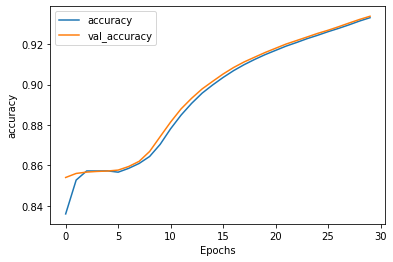

In [28]:
plot_graphs(history, 'accuracy')

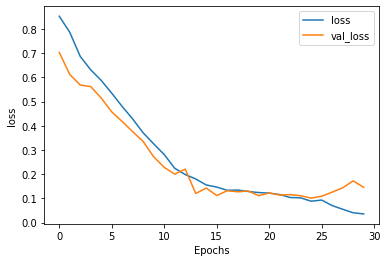

In [29]:
plot_graphs(history, 'loss')

### 5.2 결과 확인

In [31]:
SAVE_FILE_NM = "weights.h5"
model.load_weights(os.path.join(DATA_PATH, MODEL_NAME, SAVE_FILE_NM))

In [32]:
query = "남자친구 승진 선물로 뭐가 좋을까?"

test_index_inputs, _ = enc_processing([query], char2idx)    
predict_tokens = model.inference(test_index_inputs)
print(predict_tokens)

print(' '.join([idx2char[str(t)] for t in predict_tokens]))

[28 53 60 27]
평소에 필요한 것 생각해보세요
